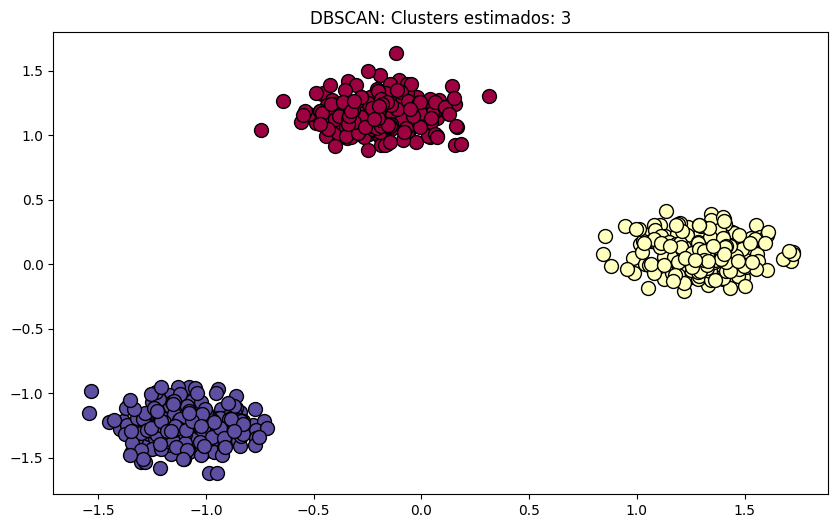

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Generar Datos Sintéticos
X, y = make_blobs(n_samples=750, centers=3, cluster_std=0.8, random_state=42)

# Normalizar los datos
X = StandardScaler().fit_transform(X)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(X)

# Etiquetas agrupamiento
labels = dbscan.labels_

# Identificador de puntos centrales
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Número de grupos (ignorando ruido)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Visualizar resultados
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
plt.figure(figsize=(10, 6))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col == 'k' # Color negro para ruido

    class_member_mask = (labels == k)

    # Graficar puntos centrales
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], marker='o', c=[col], edgecolors='k', s=100, linewidths=1)

    # Graficar puntos no centrales
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], marker='o', c=[col], edgecolors='k', s=30, linewidths=1)

plt.title('DBSCAN: Clusters estimados: %d' % n_clusters)
plt.show()
